In [2]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from datetime import datetime as dt
from scipy import stats

from news_vec.utils import read_json_gz_lines

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [4]:
df = pd.DataFrame(list(tqdm(read_json_gz_lines('../../data/clf-acc-ts-ova.json/'))))

136500it [00:00, 414686.87it/s]


In [5]:
df.head(10)

,acc,domain,window
0,0.537594,cnn.com,83
1,0.690476,breitbart.com,9
2,0.634085,huffingtonpost.com,58
3,0.720551,apnews.com,43
4,0.699248,breitbart.com,5
5,0.562657,cnn.com,20
6,0.729323,msnbc.com,58
7,0.726817,bloomberg.com,20
8,0.646616,foxnews.com,64
9,0.771930,buzzfeed.com,54


In [6]:
rows = []
for d in df.domain.unique():
    pdf = df[df.domain==d].sort_values('window')
    lr = stats.linregress(pdf.window, pdf.acc)
    rows.append((d, lr.slope, lr.intercept, lr.rvalue, lr.pvalue))

In [7]:
lr_df = pd.DataFrame(rows, columns=('domain', 'slope', 'intercept', 'r', 'p'))

In [8]:
lr_df.sort_values('slope', ascending=False)

,domain,slope,intercept,r,p
6,foxnews.com,0.000444,0.623095,0.555931,0.000000e+00
7,buzzfeed.com,0.000382,0.775460,0.478419,0.000000e+00
12,wsj.com,0.000204,0.680000,0.303309,6.042507e-193
11,dailycaller.com,0.000187,0.628784,0.262654,1.913153e-143
1,breitbart.com,0.000083,0.686295,0.124615,8.024050e-33
3,apnews.com,0.000066,0.709677,0.106320,2.706237e-24
9,washingtonpost.com,0.000038,0.604969,0.053381,3.485399e-07
5,bloomberg.com,0.000002,0.745638,0.003328,7.509081e-01
10,npr.org,-0.000068,0.628500,-0.102275,1.361675e-22
8,nytimes.com,-0.000095,0.640997,-0.142361,2.071541e-42


In [9]:
tick_labels = [
    dt.fromtimestamp(ts).strftime('%-m/%Y')
    for ts in np.linspace(1483228802, 1537207799, 10, dtype='int')
]

In [10]:
tick_locs = np.linspace(0, len(df.window.unique()), len(tick_labels), dtype='int')

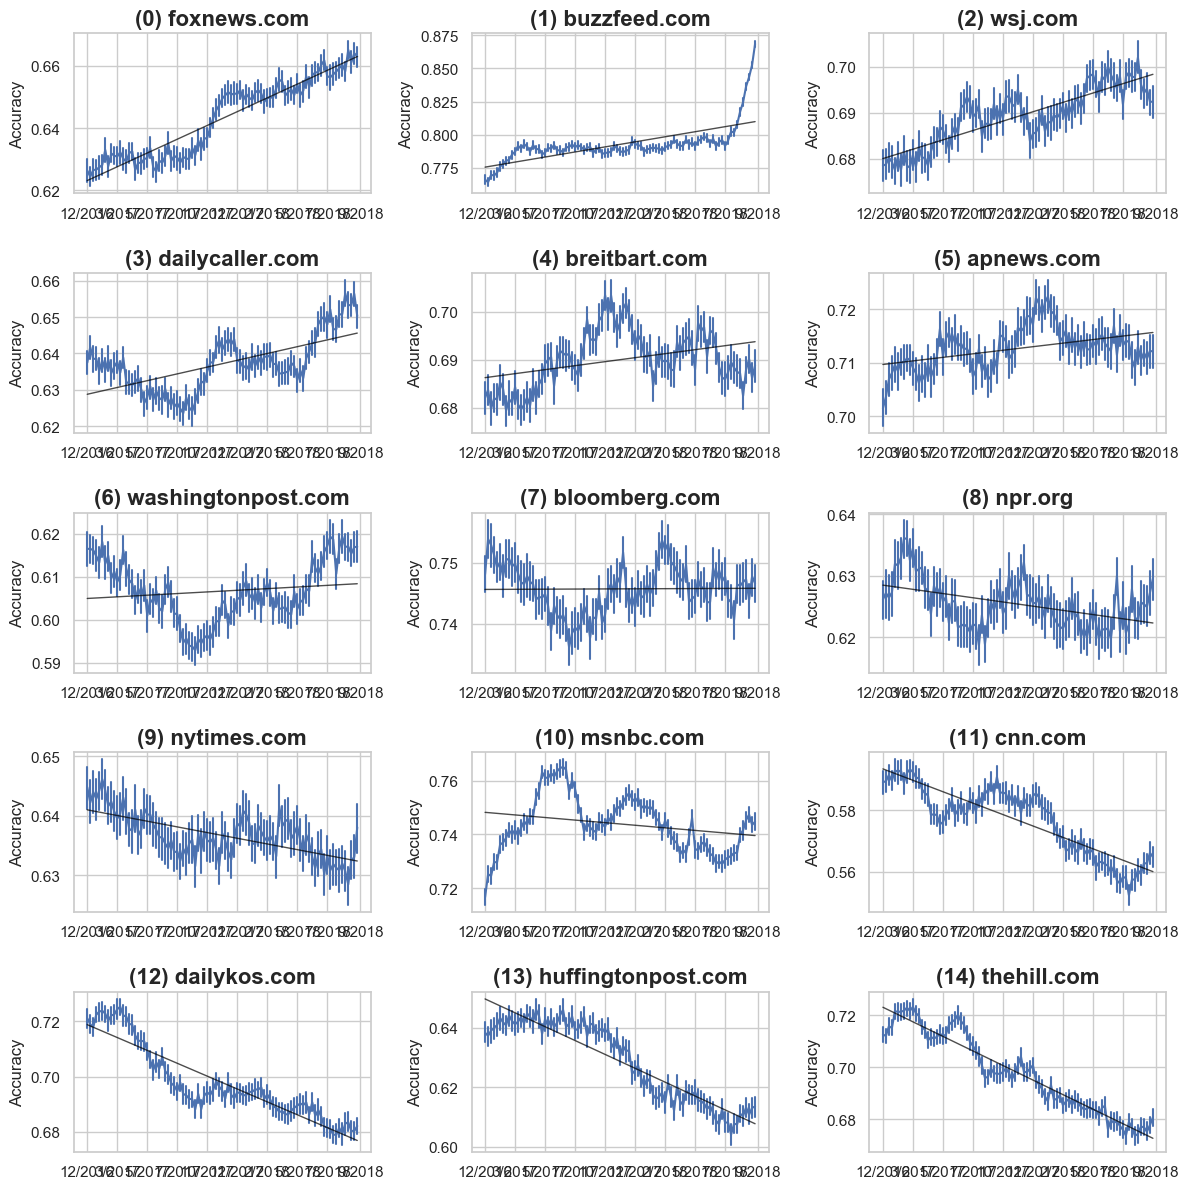

In [15]:
fig, axes = plt.subplots(int(len(lr_df)/3), 3, figsize=(12,12), dpi=100)

for i, r in enumerate(lr_df.sort_values('slope', ascending=False).itertuples()):
    
    ax = axes.reshape(-1)[i]
    pdf = df[df.domain==r.domain].sort_values('window')
    
    fitx = np.array([pdf.window.min(), pdf.window.max()])
    fity = r.slope * fitx + r.intercept
    
    sns.lineplot(x='window', y='acc', data=pdf, ax=ax, err_style='bars')
    ax.plot(fitx, fity, c='black', linewidth=1, alpha=0.7)
    ax.set_xticks(tick_locs)
    ax.set_xticklabels(tick_labels)
    
    ax.set_title(f'({i}) {r.domain}', fontdict=dict(fontsize=16, fontweight='bold'))
    ax.set_xlabel(None)
    ax.set_ylabel('Accuracy')
    
plt.tight_layout(h_pad=2)
plt.savefig('figures/ts-ova.png', bbox_inches='tight')

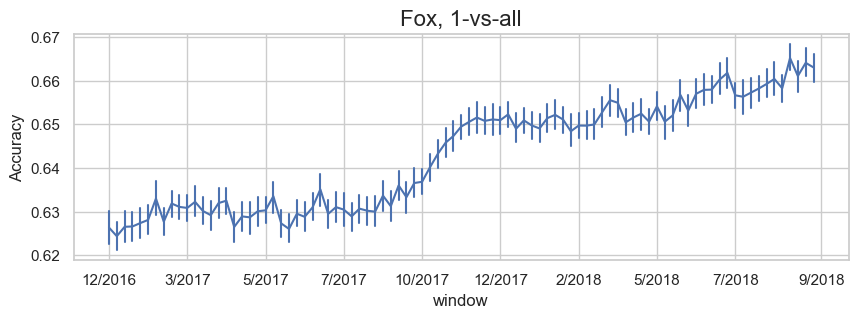

In [17]:
pdf = df[df.domain=='foxnews.com'].sort_values('window')

plt.figure(figsize=(10, 3), dpi=100)
sns.lineplot(x='window', y='acc', data=pdf, err_style='bars')
plt.xticks(tick_locs, tick_labels)

plt.title('Fox, 1-vs-all', fontsize=16)
plt.ylabel('Accuracy')
plt.savefig('figures/ts-ova-fox.png')